## CS636 Computer Vision
### Sphere Assignment
### 202363006 - Shah Rushabh Rupambhai

#### Task:

Given different source positions and the resulting image of a given sphere.

1) Take input: sphere radius, image size, source directions.

2) Write a code to generate image by calculating p and q and finally R(p(x,y),q(x,y))=E(x,y)

#### Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Function for generating the sphere


The function `generate_sphere` creates a simulated image of a sphere illuminated by multiple or from a single light source(s) based on the values user provide.

1. **Input Parameters**:
   - `r`: Sphere Radius, input is in float.
   - `img_size`: Image Size just have to pass single integer value and it will convert it into x * y format like if we pass 400 then 400 * 400 size of image plane.
   - `src_directions`: Contains list of light source directions. Each direction is represented as a 3D vector `[x y z]`.

2. **Generating Image Grid**:
   - Using `np.linspace()` we are generating a grid of coordinates for image to create linearly spaced values by giving radius and size of the image.
   - It then creates a meshgrid `X` and `Y` using these coordinate arrays.

3. **Calculating Normals to Sphere Surface**:
   - For each point `(X, Y)` on the grid, the function calculates the corresponding `Z` coordinate using the equation of a sphere: \(Z = \sqrt{r^2 - X^2 - Y^2}\), assuming the sphere is at [0 0 0].
   - Using these coordinates `(X, Y, Z)`, it computes the surface normals `(Nx, Ny, Nz)` to the sphere surface. These normals represent the direction perpendicular to the surface at each point.

   $$
   \begin{aligned}
      Z = \sqrt{r^2 - X^2 - Y^2} \\

      Nx = -X / \sqrt{X^2 + Y^2 + Z^2} \\
      
      Ny = -Y / \sqrt{X^2 + Y^2 + Z^2} \\
      
      Nz = -Z / \sqrt{X^2 + Y^2 + Z^2} \\
   \end{aligned}
   $$

4. **Intensity Calculation**:
   -The process of intensity calculation involves initializing an intensity image, `inten`, with dimensions that match those of the image grid.
   - Next, it goes through every direction of the light source listed in `src_directions`.
   - Vectorized operations are used to compute the dot product for each direction between the direction of the light source and the surface normals `(Nx, Ny, Nz)`. The cosine of the angle formed by the normal and the direction of light is represented by the dot product.

5. **Normalization**: 
   - The function normalizes the intensity image by dividing the total intensity for each pixel by the number of light sources and scaling it to the range `[0, 255]`. By doing this, it is ensured that the intensities fall within an acceptable range for an image display.

The function returns the intensity image representing the simulated illumination of the sphere by multiple light sources.

In [2]:
def generate_sphere(r, img_size, src_directions):

    x = np.linspace(-r, r, img_size)
    y = np.linspace(-r, r, img_size)
    X, Y = np.meshgrid(x, y)
    

    Z = np.sqrt(r**2 - X**2 - Y**2)
    Nx = -X / np.sqrt(X**2 + Y**2 + Z**2)
    Ny = -Y / np.sqrt(X**2 + Y**2 + Z**2)
    Nz = -Z / np.sqrt(X**2 + Y**2 + Z**2)
    

    inten = np.zeros_like(X)
    

    for direction in src_directions:
        cos_theta = Nx * direction[0] + Ny * direction[1] + Nz * direction[2]
        R = np.maximum(0, cos_theta)
        inten += R
    

    inten = (inten / len(src_directions)) * 255
    
    return inten

#### Code for taking input from user and printing it.

In [3]:
r = float(input("Enter radius: "))
img_size = int(input("Enter size of the image: "))
src_directions = []
num_sources = int(input("Enter the number of light source directions: "))
for i in range(num_sources):
    x, y, z = map(float, input(f"Enter the direction vector for light source {i+1} (x y z): ").split())
    src_directions.append([x, y, z])


print("\nSphere Radius:", r)
print("Image Size:", img_size, "x", img_size)
print("Source Directions:")
for i, direction in enumerate(src_directions):
    print(f"  Light Source {i+1}: {direction}")


Sphere Radius: 1.0
Image Size: 400 x 400
Source Directions:
  Light Source 1: [1.0, 0.0, 0.0]
  Light Source 2: [1.0, 1.0, 0.0]


#### Calling the function and ploting the image in Grayscale

C:\Users\RUSHABH\AppData\Local\Temp\ipykernel_14252\740813671.py:8: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt(r**2 - X**2 - Y**2)


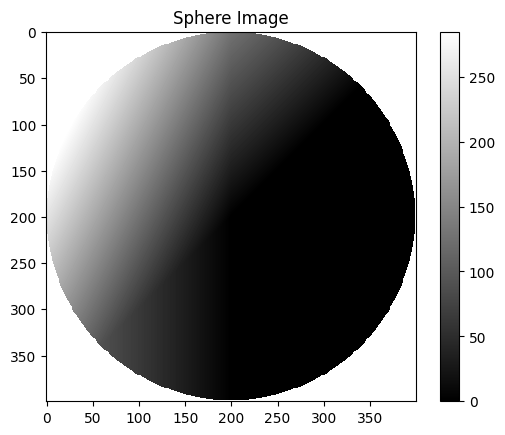

In [4]:

image = generate_sphere(r, img_size, src_directions)


plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Sphere Image')
plt.show()